<div style="padding:20px 30px 25px;
            color:#004346;
            font-size:40px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400">
<p style="font-weight: bold; text-align: center;">Определение возраста покупателей</p>


</div>

<div style="padding:0px 40px 30px; 
            color:#004346;
            font-size:110%;
            display:fill;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:450;"> 
    
__Заказчик:__ cетевой супермаркет «Хлеб-Соль».
    
__Описание задачи:__ супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
    
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

__Постановка задачи:__ разработка модели, которая по фотографии определит приблизительный возраст человека.
    
__Оценка результата:__ в данной задаче мы будем использовать метрику MAE (Mean Absolute Error) для оценки качества модели. Цель состоит в том, чтобы минимизировать метрику качества: значения MAE на тестовой выборке не должно привышать 8.
    
__Описание данных:__ набор фотографий людей с указанием возраста.
    


</div>    

<div style="padding:0px 20px 10px;
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400">

# Используемые библиотеки

</div>

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# константы
RANDOM_SEED = 42
# настройки блокнота
random.seed(RANDOM_SEED)

<div style="padding:0px 20px 10px;
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400">

# Исследовательский анализ данных

</div>

## Загрузка данных

In [ ]:
# загрузка CSV-файла:
try:
    df = pd.read_csv('/datasets/faces/labels.csv')
    display(df.head(2))
except:
    print('Данные не доступны')

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18


In [ ]:
# создание ImageDataGenerator с масштабированием пикселей
datagen = ImageDataGenerator(rescale=1./255)
# загрузка данных из датафрейма df
gen_flow = datagen.flow_from_dataframe(
        dataframe=df,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        seed=RANDOM_SEED)

Found 7591 validated image filenames.


## Общая информация

In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


None

__Проверим пропуски в данных:__

In [ ]:
print(f'Общее количество пропусков в данных: {sum(col_pas for col_pas in df.isna().sum())}')

Общее количество пропусков в данных: 0


__Проверим дубликаты в данных:__

In [ ]:
print(f'Количество дубликатов в данных:{df.duplicated().sum()}')

Количество дубликатов в данных:0




>- Данные загружены корректно:
    - доступно 7591 записуй.
>- Пропуски в данных отсутствуют.
>- Дубликаты в данных отсутствуют.   
    


##  Анализ признаков

__Распределения возраста в выборке:__

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
real_age,7591.0,31.201159,17.14506,1.0,20.0,29.0,41.0,100.0


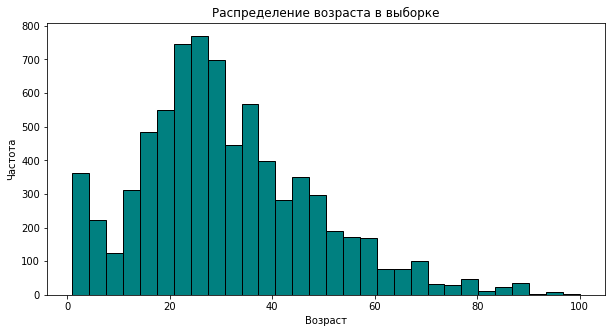

In [ ]:
# визуализация
plt.figure(figsize=(10, 5))
plt.hist(df['real_age'], bins=30, edgecolor='k', color='teal')
plt.title('Распределение возраста в выборке')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

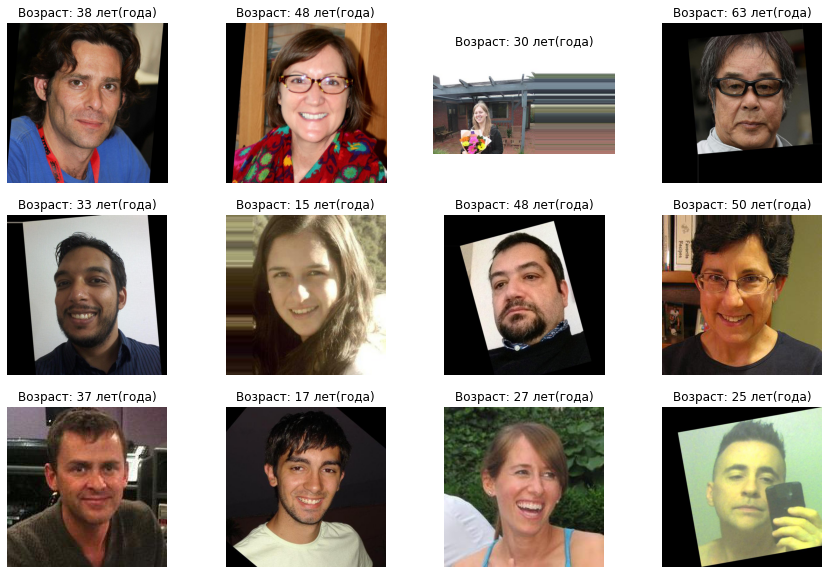

In [ ]:
# выборка из 12-ти фотографий
sample_images = random.sample(df['file_name'].tolist(), 12)

# отображение фотокгафий
plt.figure(figsize=(15, 10))
for i, image_filename in enumerate(sample_images):
    img_path = '/datasets/faces/final_files/' + image_filename
    img = plt.imread(img_path)
    age = df[df['file_name'] == image_filename]['real_age'].values[0]
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f'Возраст: {age} лет(года)')
    plt.axis('off')

plt.show()

<div style="padding: 30px 25px; border: 2px teal solid">
    
__Исследовательский анализ данных позволил получить следующие выводы:__

- Объем данных: В датасете содержится 7591 саписей, что является небольшой выборкой для оценки возраста.

- Распределение возрастов: Распределение возраста в данных имеет положительную асимметрию, с большим количеством фотографий в возрастном диапазоне от 20 до 41 лет. В выборке также присутствуют данные о детях и пожилых людях.

- Сложности в данных:
    - наличие объектов, закрывающих лицо (например, борода, жвачка, очки, головной убор),
    - наклоненные и нецентрированные фотографии, и как следствие: черные пространства вокруг изображений.

Изучение данных и их особенностей является важным этапом при разработке модели для определения возраста покупателей. Учитывая эти особенности, можно будет лучше подготовить данные и выбрать подходящую архитектуру модели, учитывающую сложности визуального анализа фотографий для более точного определения возраста.
</div>

<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Обучение модели
    
</div>

## Код модели

In [ ]:
# используемые библиотеки
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

# данные для обучения
def load_train(path):
    
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, 
                                 horizontal_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 rescale=1./255)
    
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=42)

    return train_gen_flow

# данные для тестирования
def load_test(path):
    
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=42)

    return train_gen_flow

# архитектура нейронной сети
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu')) 
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

# обучение модели
def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    
    
    
    if steps_per_epoch==None: steps_per_epoch = len(train_data)
    if validation_steps==None: validation_steps = len(test_data)
        
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch = steps_per_epoch,
              validation_steps = validation_steps,
              verbose=2,
              shuffle=True)

    return model


## Вывод консоли

```
Found 5694 validated image filenames.
Found 1897 validated image filenames.

<class 'tensorflow.python.keras.engine.sequential.Sequential'>

Train for 356 steps, validate for 119 steps

Epoch 1/10
356/356 - 124s - loss: 214.6184 - mae: 10.6863 - val_loss: 830.8268 - val_mae: 23.8269
Epoch 2/10
356/356 - 92s - loss: 98.2788 - mae: 7.5542 - val_loss: 134.5879 - val_mae: 8.7135
Epoch 3/10
356/356 - 94s - loss: 62.1962 - mae: 6.0375 - val_loss: 103.3451 - val_mae: 7.6865
Epoch 4/10
356/356 - 91s - loss: 78.6921 - mae: 6.7670 - val_loss: 89.3853 - val_mae: 6.9987
Epoch 5/10
356/356 - 97s - loss: 51.9986 - mae: 5.5424 - val_loss: 78.9405 - val_mae: 6.7023
Epoch 6/10
356/356 - 95s - loss: 46.6334 - mae: 5.2182 - val_loss: 75.8505 - val_mae: 6.6487
Epoch 7/10
356/356 - 96s - loss: 35.9299 - mae: 4.6131 - val_loss: 72.3022 - val_mae: 6.2313
Epoch 8/10
356/356 - 96s - loss: 28.9904 - mae: 4.1364 - val_loss: 75.0366 - val_mae: 6.4530
Epoch 9/10
356/356 - 97s - loss: 26.6679 - mae: 3.9590 - val_loss: 71.0552 - val_mae: 6.4288
Epoch 10/10
356/356 - 96s - loss: 24.1058 - mae: 3.7784 - val_loss: 65.9521 - val_mae: 6.1102


119/119 - 10s - loss: 65.9521 - mae: 6.1102
Test MAE: 6.1102
```

__Анализ модели:__

- Обученная модель была построена на базе архитектуры ResNet50, что является мощным решением для задач компьютерного зрения.

- Модель не проявила признаки переобучения, так как функции потерь и средней абсолютной ошибки (MAE) уменьшались как на обучающем, так и на валидационном наборах данных с увеличением количества эпох обучения. Это указывает на хорошее обобщение модели.

- Точность предсказаний: Модель продемонстрировала высокую точность, средняя абсолютная ошибка (MAE) составила 6.1. Это значит, что в большинстве случаев модель ошибается на шесть лет, что сопоставимо с человеческой ошибкой.

- Потенциал улучшения: Учитывая, что функции потерь и MAE на валидационном наборе данных продолжают уменьшаться к концу пяти эпох, можно предположить, что модель могла бы выиграть от дополнительных эпох обучения.


<div style="padding:0px 20px 10px; 
            color:#004346;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:20px;
            border: 5px double;
            border-color:#201E20;
            background-color: #E8F1F2;
            overflow:hidden;
            font-weight:400"> 

# Вывод
    
</div>

- Обученная нейронная сеть, построенная на базе архитектуры ResNet50, демонстрирует впечатляющую способность предсказывать возраст покупателей с хорошей точностью, сопоставимой с человеческой.
- Качество модели соответствует минимальным заявленным требованиям заказчика.
- Использование графических процессоров (GPU) и глубокого обучения нейронных сетей позволяет эффективно обрабатывать большие объемы данных с высокой точностью.